In [1]:
import os
import matplotlib.pyplot as plt
import pickle as pkl
import numpy as np


W_ALL = {}
ADJ = {}


pops = {
    "ES": [0, 79],
    "EA": [80, 119],
    "EM": [140, 179]
}


def _displayAdj(A, name):
    A[A == 0] = np.NaN
    vmin = np.amin(A[np.logical_not(np.isnan(A))])
    vmax = np.amax(A[np.logical_not(np.isnan(A))])

    S = 5
    plt.figure(figsize=(S, S))

    plt.imshow(A, cmap='plasma', interpolation='nearest', vmin=vmin, vmax=vmax)
    plt.clim(vmin, vmax)

    xoffset = S * 5
    plt.xticks([-0.5, 39.5, 80], [' ' * xoffset + 'EA',' ' * xoffset +  'EM'])
    plt.xlabel('Post-synapse population')

    yoffset = int(S * 1.5)
    plt.yticks([-0.5, 79.5, 119.5], ['\n' * (yoffset*2) + 'ES', '\n' * yoffset + 'EA'])
    plt.ylabel('Pre-synapse population')
    plt.colorbar()
    plt.tight_layout()
    # plt.show()
    plt.savefig('adj-{}.png'.format(name), dpi=300)
    

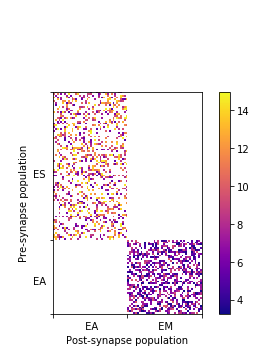

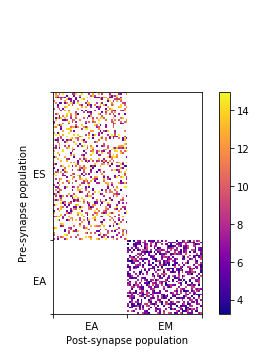

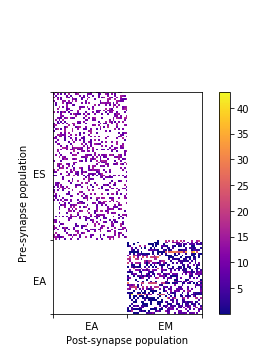

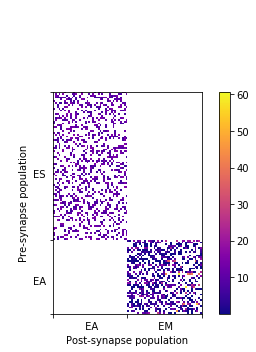

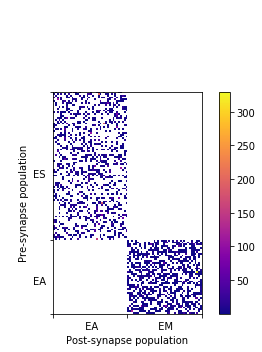

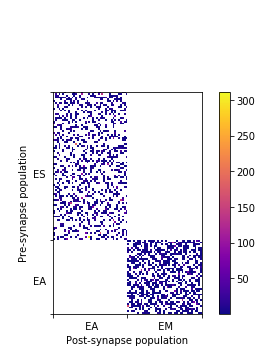

In [46]:
# wdirs = ['results/hpsearch-2021-09-06/best/1_run_168',
#         'results/20210907-ES1500it',
#         'results/evol-stdp-rl']
# wdirnames = ['stdp', 'evol', 'evol-stdp-rl']
wdirs = ['results/seedrun_m1-2022-01-16/run_seed1394398',
         'results/seedrun_m1-2022-01-16/run_seed5397326',
         'results/seedrun_m1-2022-01-16/run_seed1394398/continue_1/continue_1/continue_2/continue_2/continue_2',
         'results/seedrun_m1-2022-01-16/run_seed5397326/continue_1/continue_1/continue_2/continue_2/continue_2',
         'results/20220129-EVOL_b5-goodseed/continue_1/continue_1/continue_1/continue_1/continue_1/continue_1/continue_1/continue_1',
         'results/20220128-EVOL_b5-badseed/continue_1/continue_1/continue_1/continue_1/continue_1/continue_1/continue_1/continue_1/continue_1/continue_1',
        ]
wdirnames = ['init_s6', 'init_s3', 'stdp_s6', 'stdp_s3', 'evol_s6', 'evol_s3']
eval_indices = [0, 0, 1, 50, 1, 2]

for idx,wname in enumerate(wdirnames):
    wdir = wdirs[idx]
    eval_idx = eval_indices[idx]

    with open(os.path.join('../', wdir, 'synWeights.pkl'), 'rb') as f:
        W = pkl.load(f)
        timepoints = sorted(W.keys())
        

    W2 = {}
    for preid, pre_d in W.items():
        W2[preid] = {}
        for postid, v in pre_d.items():
            W2[preid][postid] = v[eval_idx][1]
    W = W2

    ids = sorted(list(set([preid for preid in W.keys()] + [postid for pre_map in W.values() for postid in pre_map.keys()])))


    A = np.zeros((max(ids)+1, max(ids)+1))
    for preid, pre_map in W.items():
        for postid, value in pre_map.items():
            A[preid][postid] = value        
    A = np.concatenate((A[0:120, 80:120], A[0:120, 140:180]), axis=1)


    _displayAdj(A, wname)
    W_ALL[wname] = W
    ADJ[wname] = A

In [ ]:
W[4][80][-1:]

In [154]:
wdirnames_sep, seedid, relid = ['stdp_s6', 'evol_s6'], 's6', 'init_s6'
# wdirnames_sep, seedid = ['stdp_s3', 'evol_s3'], 's3'

RELATIVE = False
for n in wdirnames_sep:
    assert n in wdirnames
wdirnames_sep

['stdp_s6', 'evol_s6']

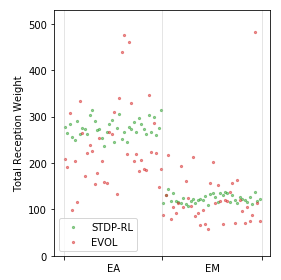

In [155]:
import seaborn as sns
C = sns.color_palette()[2:]
legend = ['STDP-RL', 'EVOL']

S = 4
plt.figure(figsize=(S, S))

miny = 100000
maxy = 0
for i, k in enumerate(wdirnames_sep):
    if RELATIVE:
        A = ADJ[k] - ADJ[relid]
        A[~(A >= -1000)] = 0
    else:
        A = ADJ[k]
        A[~(A >= 0)] = 0
    N = A.shape[1]
    y = np.sum(A, axis=0)
    plt.scatter(range(N), y, color=C[i], s=5, alpha=0.5)
    maxy = max(np.max(y), maxy)
    miny = min(np.min(y), miny)
    
if RELATIVE:
    plt.ylim([miny*1.10, maxy * 1.10])
else:
    plt.ylim([0, maxy * 1.10])
plt.legend(legend)


xoffset = int(S * 8)
plt.xticks([-0.5, 39.5, 80], [' ' * xoffset + 'EA',' ' * xoffset +  'EM'])
plt.grid(axis='x', alpha=0.4)
plt.ylabel('Total Reception Weight')
plt.tight_layout()
# plt.show()
plt.savefig('reception_{}.png'.format(seedid), dpi=300)


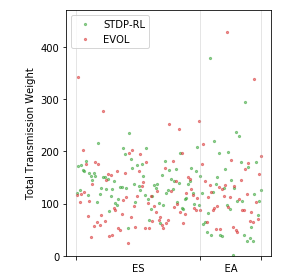

In [156]:

S = 4
plt.figure(figsize=(S, S))

miny = 10000
maxy = 0
for i,k in enumerate(wdirnames_sep):
    if RELATIVE:
        A = ADJ[k] - ADJ[relid]
        A[~(A >= -1000)] = 0
    else:
        A = ADJ[k]
        A[~(A >= 0)] = 0
    N = A.shape[0]
    y = np.sum(A, axis=1)
    plt.scatter(range(N), y, color=C[i], s=5, alpha=0.5)
    maxy = max(np.max(y), maxy)
    miny = min(np.min(y), miny)
    
    
if RELATIVE:
    plt.ylim([miny*1.10, maxy * 1.10])
else:
    plt.ylim([0, maxy * 1.10])
plt.legend(legend)


xoffset = int(S * 5)
plt.xticks([-0.5, 79.5, 119.5], [' ' * (xoffset*2) + 'ES', ' ' * xoffset + 'EA'])
plt.grid(axis='x', alpha=0.4)
plt.ylabel('Total Transmission Weight')
plt.tight_layout()
plt.savefig('transmission_{}.png'.format(seedid), dpi=300)
# plt.show()


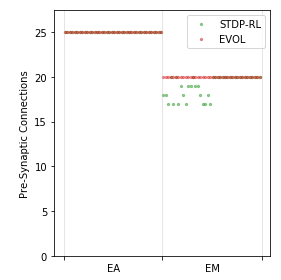

In [40]:

S = 4
plt.figure(figsize=(S, S))

maxy = 0
for i,k in enumerate(wdirnames_sep):
    A = ADJ[k]
    A[~(A >= 0)] = 0
    N = A.shape[1]
    y = np.sum(A > 0, axis=0)
    plt.scatter(range(N), y, color=C[i], s=5, alpha=0.5)
    maxy = max(np.max(y), maxy)
    
    
plt.ylim([0, maxy * 1.10])
plt.legend(legend)


xoffset = int(S * 8)
plt.xticks([-0.5, 39.5, 80], [' ' * xoffset + 'EA',' ' * xoffset +  'EM'])
plt.grid(axis='x', alpha=0.4)
plt.ylabel('Pre-Synaptic Connections')
plt.tight_layout()
# plt.show()
plt.savefig('presyn-conn_{}.png'.format(seedid), dpi=300)


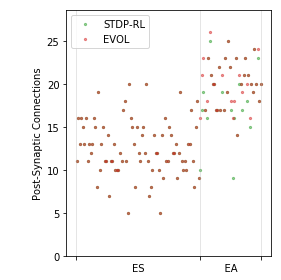

In [42]:

S = 4
plt.figure(figsize=(S, S))

maxy = 0
for i,k in enumerate(wdirnames_sep):
    A = ADJ[k]
    A[~(A >= 0)] = 0
    N = A.shape[0]
    y = np.sum(A > 0, axis=1)
    plt.scatter(range(N), y, color=C[i], s=5, alpha=0.5)
    maxy = max(np.max(y), maxy)
    
    
plt.ylim([0, maxy * 1.10])
plt.legend(legend)


xoffset = int(S * 5)
plt.xticks([-0.5, 79.5, 119.5], [' ' * (xoffset*2) + 'ES', ' ' * xoffset + 'EA'])
plt.grid(axis='x', alpha=0.4)
plt.ylabel('Post-Synaptic Connections')
plt.tight_layout()
# plt.show()
plt.savefig('postsyn-conn_{}.png'.format(seedid), dpi=300)


In [45]:
ADJ['stdp_s6'].shape


(120, 80)

In [47]:
wdirnames

['init_s6', 'init_s3', 'stdp_s6', 'stdp_s3', 'evol_s6', 'evol_s3']

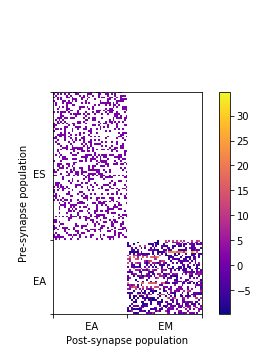

In [48]:
_displayAdj(ADJ['stdp_s6'] - ADJ['init_s6'], 'stdp_delta')

In [50]:
ADJ['init_s6']

array([[        nan, 11.52113869,         nan, ...,         nan,
                nan,         nan],
       [ 9.92710899,         nan, 11.01747647, ...,         nan,
                nan,         nan],
       [        nan,  6.666278  ,         nan, ...,         nan,
                nan,         nan],
       ...,
       [        nan,         nan,         nan, ...,         nan,
         4.48188103,  4.70138546],
       [        nan,         nan,         nan, ...,         nan,
         4.48025653,         nan],
       [        nan,         nan,         nan, ...,  9.65967947,
                nan,         nan]])

In [65]:
sum(sum(ADJ['stdp_s6'] > 0))
# sum(sum(ADJ['init_s6'] > 0))
# sum(sum(ADJ['evol_s6'] > 0))

1764

In [64]:
sum(sum(ADJ['stdp_s6'] - ADJ['init_s6'] > -100000))

1764

In [66]:
K = ADJ['init_s6'] > 0

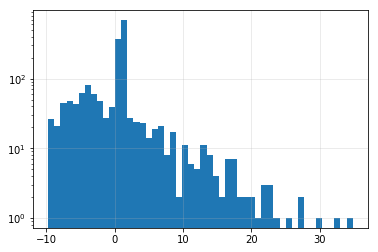

In [95]:
def adj_vals(v, init_v):
    vals = ADJ[v][K]
    vals[np.logical_not(vals > -10000)] = 0
    vals_init = ADJ[init_v][K]
    return vals - vals_init
    
d = adj_vals('stdp_s6', 'init_s6')
plt.grid(alpha = 0.3)
plt.hist(d, bins=50, log=True)
plt.show()

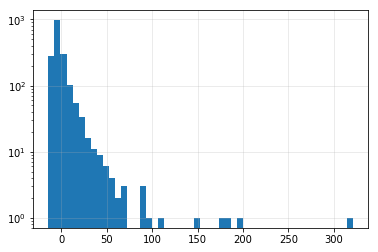

In [96]:
d = adj_vals('evol_s6', 'init_s6')
plt.grid(alpha = 0.3)
plt.hist(d, bins=50, log=True)
plt.show()

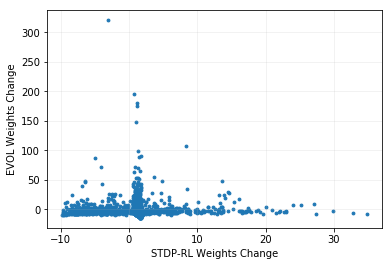

SpearmanrResult(correlation=-0.09030356902373529, pvalue=0.00012483329664567314)


In [147]:
from scipy.stats import spearmanr

d1 = adj_vals('stdp_s6', 'init_s6')
d2 = adj_vals('evol_s6', 'init_s6')

fig = plt.figure(figsize=(6,4))
ax = plt.gca()
# ax.set_xscale('log')
# ax.set_yscale('log')
ax.scatter(d1, d2, s=8)
plt.grid(alpha=0.2)
# plt.xlim(-10, 10)
# plt.ylim(-20,100)
plt.xlabel('STDP-RL Weights Change')
plt.ylabel('EVOL Weights Change')

plt.savefig('weights-delta.png', dpi=300)
plt.show()

print(spearmanr(d1, d2))